In [1]:
from imports import *

In [2]:
galaxy = 'm51'
galaxy_muse = galaxy
rootdir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_extended/%s/' %galaxy
rootdir_bp = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/' 

narrowband_filter = 'f658n'
instrument_f555w  = 'acs'
instrument_f65Xn = 'acs'
instrument_f814w = 'acs'

# Load files
hdu_hst_f555w   = get_hdu(rootdir, 'hst/*f555w*.fits')
hdu_hst_f65Xn   = get_hdu(rootdir, 'hst/*f658n*.fits')
hdu_hst_f814w   = get_hdu(rootdir, 'hst/*f814w*.fits')

# Get filter curve info
bp = get_bandpassinfo(rootdir_bp)

# Cosmic ray thresholds
cr_threshold = 0.25
cr_dilation_iterations = 1

/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_extended/m51/hst/hlsp_heritage_hst_acs-wfc_m51_f555w_v1_drz.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_extended/m51/hst/hlsp_heritage_hst_acs-wfc_m51_f658n_v1_drz.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_extended/m51/hst/hlsp_heritage_hst_acs-wfc_m51_f814w_v1_drz.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_ACS_WFC.F550M.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_ACS_WFC.F555W.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_ACS_WFC.F658N.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_ACS_WFC.F814W.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_WFC3_UVIS1.F555W.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_WFC3_UVIS1.F657N.dat
/Users/abarnes/Dropbox/work/Smallprojects/g

In [3]:
# Make paths
make_paths(rootdir)

# Convert units 
hdu_hst_f555w = get_electrons_2_ergcm2sA(hdu_hst_f555w)
hdu_hst_f65Xn = get_electrons_2_ergcm2sA(hdu_hst_f65Xn)
hdu_hst_f814w = get_electrons_2_ergcm2sA(hdu_hst_f814w)

[Info] Outputing to the following: /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_extended/m51/hst_contsub/


Writing: /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_extended/m51/hst_contsub/m51_hst_f658n_contsub.fits
Writing: /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_extended/m51/hst_contsub/m51_hst_f658n_cont.fits
[INFO] Remove NaN values around edge of image...
INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficien

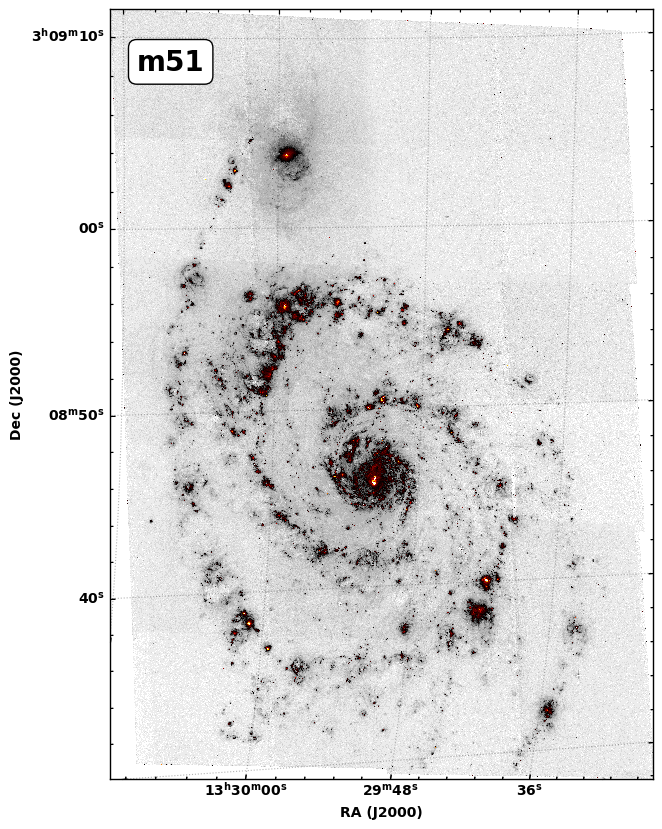

In [5]:
# Continuum subtract       
hdu_hst_halpha, hdu_hst_cont = get_contsub(hdu_hst_f65Xn.copy(), 
                                hdu_hst_f555w.copy(), 
                                hdu_hst_f814w.copy(), 
                                bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['pivot'], 
                                bp['%s_%s' %(instrument_f555w.upper(), 'F555W')]['pivot'], 
                                bp['%s_%s' %(instrument_f814w.upper(), 'F814W')]['pivot'])

# Convert units
photbw = bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['rectwidth']
hdu_hst_halpha = get_ergcm2sA_2_ergcm2s(hdu_hst_halpha, photbw)
hdu_hst_cont = get_ergcm2sA_2_ergcm2s(hdu_hst_cont, photbw)

# Save files
write_hdu(hdu_hst_halpha, rootdir, '%s_hst_%s_contsub.fits' %(galaxy, narrowband_filter))
write_hdu(hdu_hst_cont, rootdir, '%s_hst_%s_cont.fits' %(galaxy, narrowband_filter))

# Make maps plots
make_plots_map(hdu_hst_halpha, galaxy, 'hst_%s_contsub' %narrowband_filter, rootdir)